## Image Dataset Test Notebook

The goal of this notebook is to check that the dataset created by **img_dataset.py** is correct.<br>
In particular, the labels saved by the simulator should match the true road lanes.

### IMPORTANT 

Complete ALL the missing code in img_dataset.py from the checklist given below before running the notebook

Functions TO DO :

- [ ] Step 1a: simulator_run_check
- [ ] Step 1b: get_label_array
- [ ] Step 1c: convert_numpy_to_tensor
- [ ] Step 1d: convert_tensor_to_numpy
- [ ] Step 1e: Class ImageDataset  ➜ \_\_getitem\_\_


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import torch


from data.image_dataset import ImageDataset,convert_tensor_to_numpy
from utils.visualization import display_input
from utils.experiment import Experiment
from tests import dataset_test


In [3]:
# Creating an experiment to check the performance of the Simulator and the Img_dataset class.
exp = Experiment(name='TestExp', train=True, overwrite=True)

### Test pytorch tensor <-> numpy array conversion functions
Test if the functions that convert the arrays to tensors and vice versa return the correct data type and shape within the expected range

In [4]:
dataset_test.test_conversion()

A. Test converson of numpy array to torch tensor
PASS: image_tensor has correct datatype torch.float32
PASS: image_tensor in correct range from 0 to 1.
Input shape:    [9, 5, 3]
Expected shape: [3, 9, 5]
Output shape:   [3, 9, 5]
PASS: correct array shape after conversion

B. Test conversion from tensor in GPU to numpy array
PASS: image_numpy has correct datatype uint8
PASS: image_numpy in correct range from 0 to 255.
Input shape:    [3, 9, 5]
Expected shape: [9, 5, 3]
Output shape:   [9, 5, 3]
PASS: correct array shape after conversion
PASS: Conversion test


### Visual inspection of simulated images and their labels

If you notice any error while running the below cells, first delete the InspectSet folder present in the path
./data/input_data. Then fix the error and re-run the cells.

In [7]:
# Creating the dataset with the desired parameters (a small batch size is enough).
inspect_dataset =  ImageDataset( dataset_name='InspectSet', size=3, cfg_path=exp.params['cfg_path'])
inspect_loader = torch.utils.data.DataLoader(dataset=inspect_dataset,
                                              batch_size=1,
                                              shuffle=True, num_workers=1)

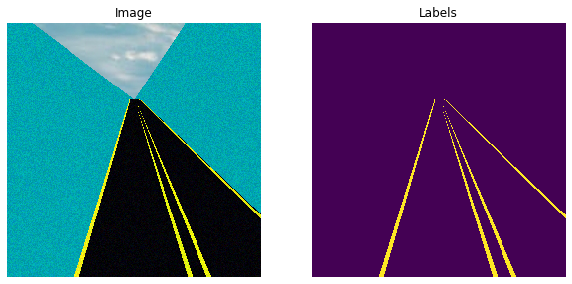

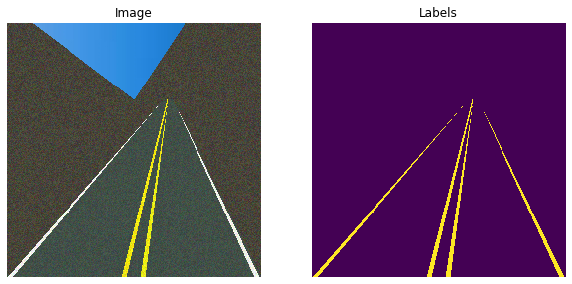

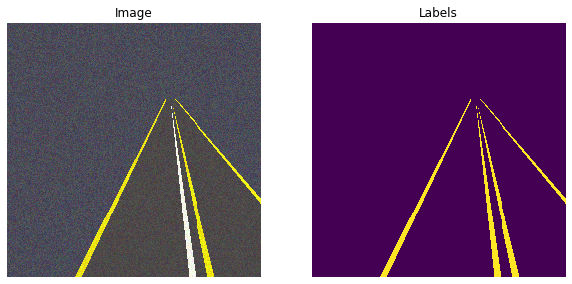

In [6]:
# Iterating the dataset and displaying the image and the labels. 
# Check visually that the labels correspond to the true road lanes.
# Note the order of the images is different each time you run this cell.
# This is because the shuffle argument in the inspector_loader (defined in the previous cell)
# is set to True.

for i, (images, labels) in enumerate( inspect_loader ):
    
    # Select first image from minibatch
    image_tensor = images[0]
    label_tensor = labels[0]
    
    
    # Convert to numpy
    image_np = convert_tensor_to_numpy(image_tensor)
    label_np = convert_tensor_to_numpy(label_tensor)
    
    # Plot the arrays
    display_input(image_np,label_np)

